In [ ]:
!pip install -q gdown
!pip install -q tensorflow
!pip install -q mediapipe
!pip install -q opencv-python

import gdown
import tensorflow as tf
import mediapipe as mp
import cv2
import numpy as np

In [ ]:
from google.colab import drive
from PIL import Image
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


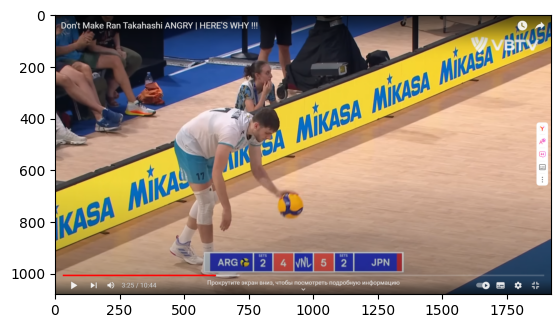

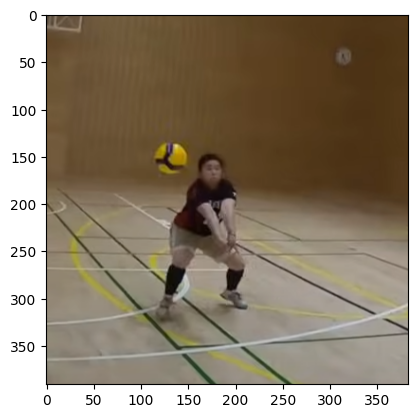

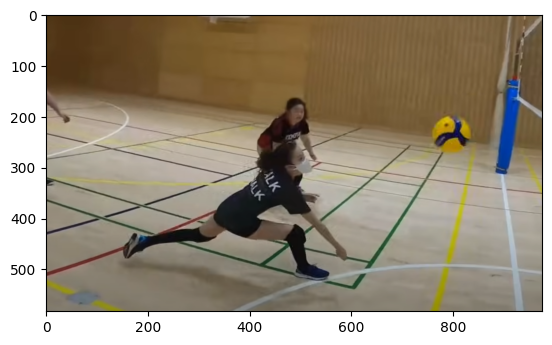

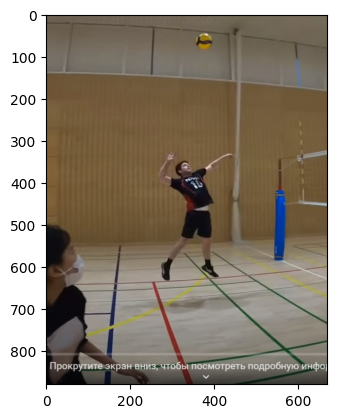

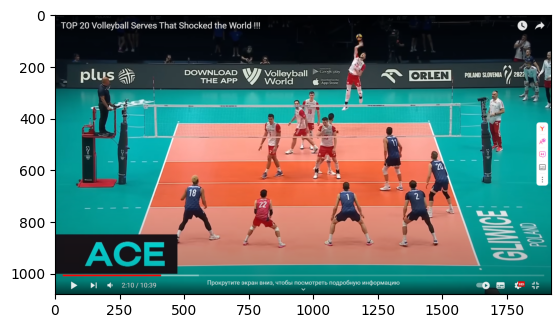

In [ ]:
from google.colab import drive
from PIL import Image
import matplotlib.pyplot as plt

# Монтирование Google Диска
drive.mount('/content/drive')

# Пути к вашим изображениям на Google Диске
image_paths = [
    '/content/drive/MyDrive/Colab Notebooks/VOLLEYPLAY_стажировка (старички) /GoPro Volleyball #34/2024-04-30_03-00-02.png',
    '/content/drive/MyDrive/Colab Notebooks/VOLLEYPLAY_стажировка (старички) /GoPro Volleyball #34/2024-05-21_00-03-47.png',
    '/content/drive/MyDrive/Colab Notebooks/VOLLEYPLAY_стажировка (старички) /GoPro Volleyball #34/2024-05-21_00-09-19.png',
    '/content/drive/MyDrive/Colab Notebooks/VOLLEYPLAY_стажировка (старички) /GoPro Volleyball #34/2024-05-21_00-12-37.png',
    '/content/drive/MyDrive/Colab Notebooks/VOLLEYPLAY_стажировка (старички) /GoPro Volleyball #34/2024-05-20_23-44-59.png'
]

# Открытие, отображение и сохранение изображений
for i, image_path in enumerate(image_paths):
    image = Image.open(image_path)
    plt.imshow(image)
    plt.show()
    image.save(image_path)  # Сохраняем изображение по тому же пути

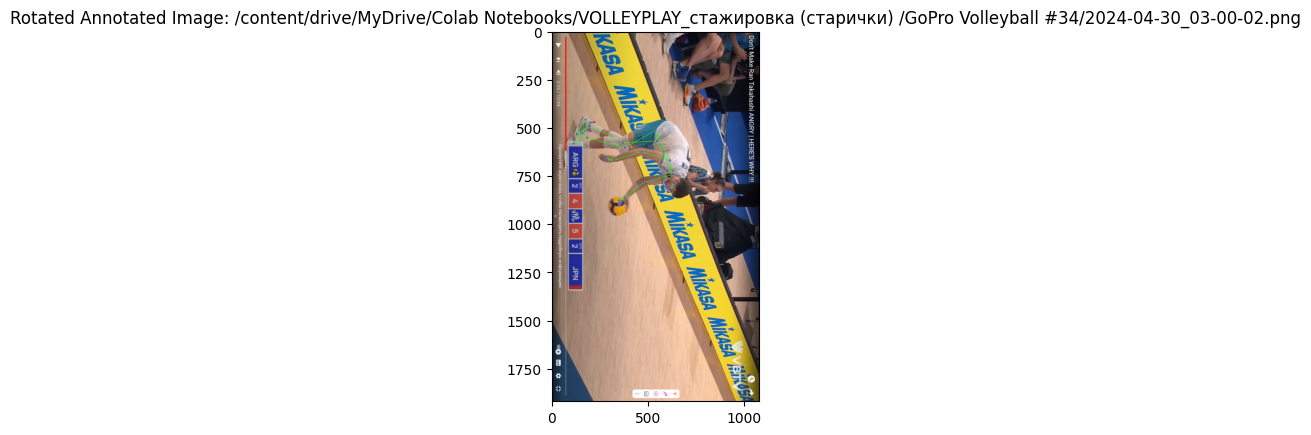

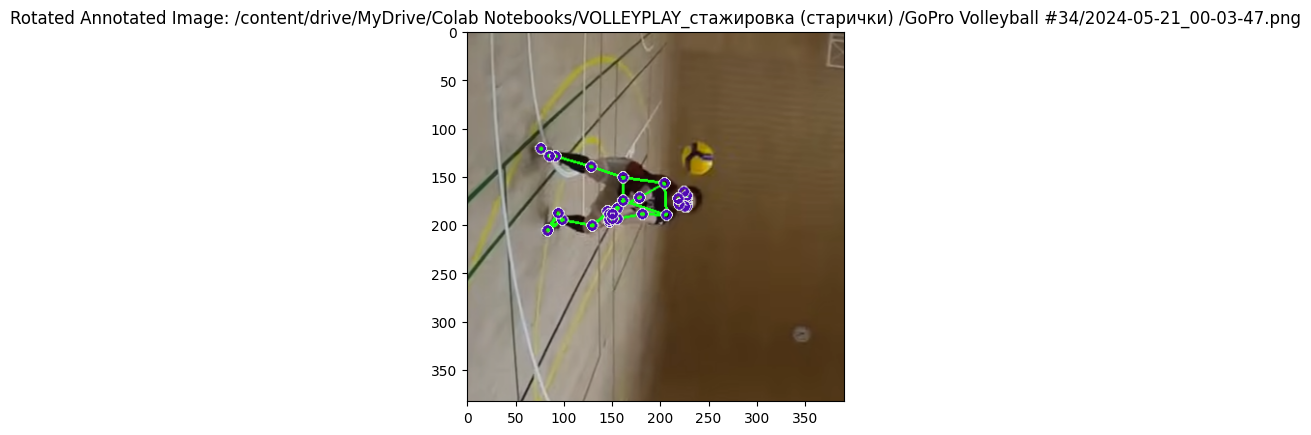

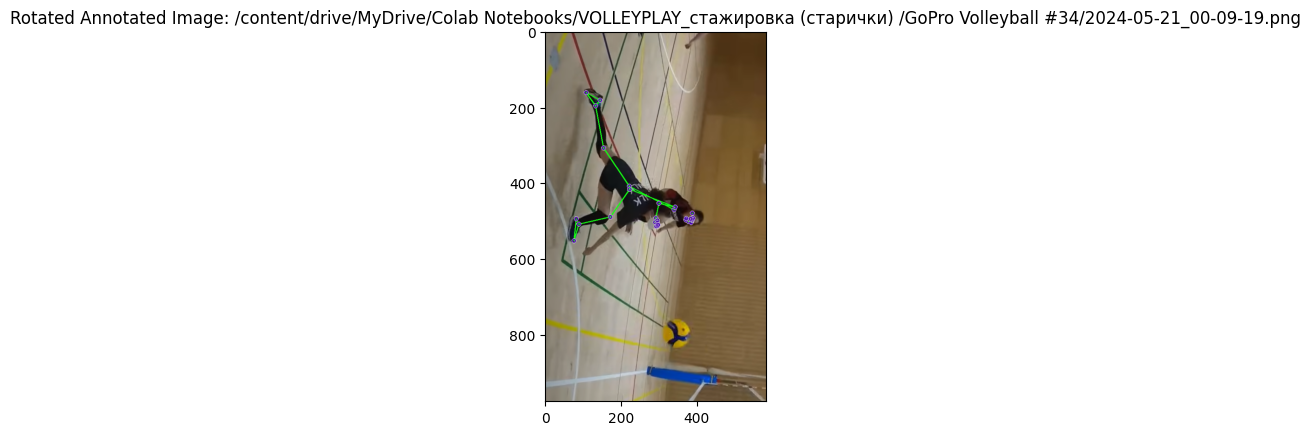

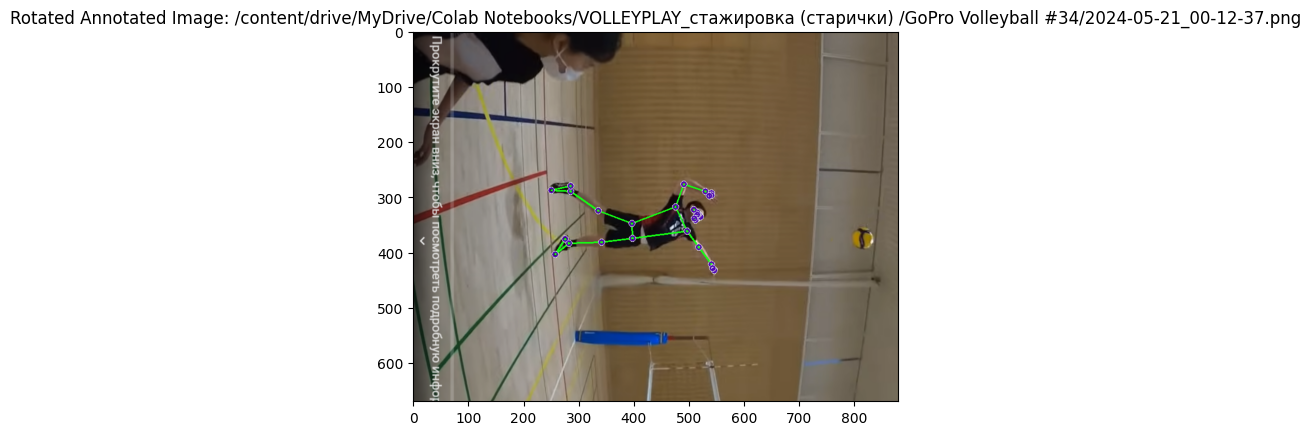

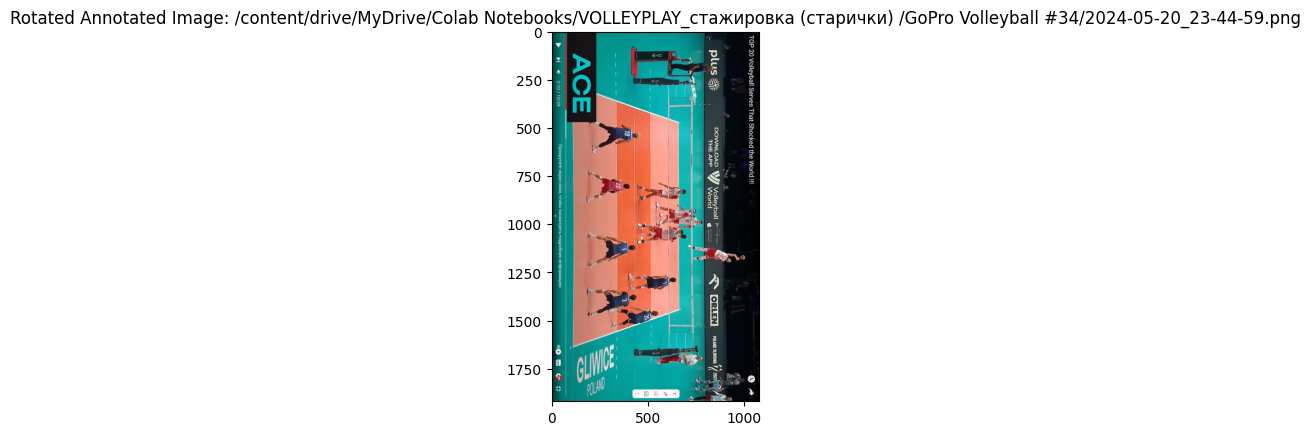

In [ ]:
# Чтение и декодирование изображений с помощью TensorFlow
images = {path: tf.image.decode_jpeg(tf.io.read_file(path)) for path in image_paths}

# Подключение к модулю MediaPipe Pose solution
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# Запуск MediaPipe Pose и отрисовка ключевых точек
with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose:
    for path, image in images.items():
        # Преобразование изображения из TensorFlow в формат, совместимый с OpenCV
        image = image.numpy()
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Обработка изображения с помощью MediaPipe Pose
        results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        # Отрисовка ключевых точек положения тела человека
        annotated_image = image.copy()
        if results.pose_landmarks:
            mp_drawing.draw_landmarks(
                annotated_image,
                results.pose_landmarks,
                mp_pose.POSE_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(180, 10, 80), thickness=2, circle_radius=4),
                mp_drawing.DrawingSpec(color=(20, 255, 20), thickness=2, circle_radius=2)
            )

        # Поворот аннотированного изображения на 90 градусов
        rotated_annotated_image = cv2.rotate(annotated_image, cv2.ROTATE_90_CLOCKWISE)

        # Отображение повернутого изображения с ключевыми точками
        plt.imshow(cv2.cvtColor(rotated_annotated_image, cv2.COLOR_BGR2RGB))
        plt.title(f'Rotated Annotated Image: {path}')
        plt.show()

Далее попытка вернуть картинки в исходное положение через:         
(Поворот аннотированного изображения на 90 градусов по часовой стрелке)
        
        rotated_back_image = cv2.rotate(annotated_image, cv2.ROTATE_90_CLOCKWISE)
Итог: не получилось.        

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


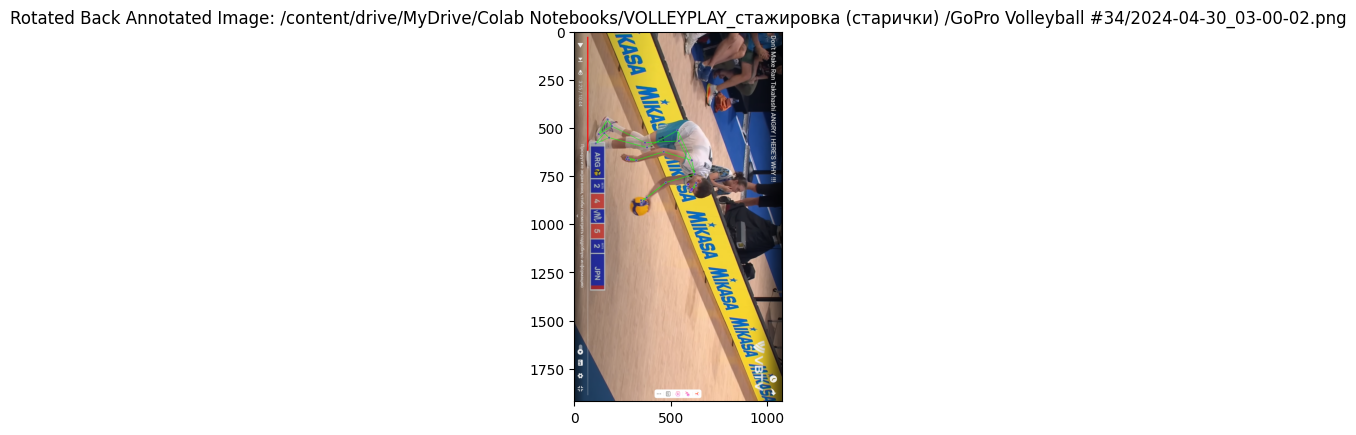

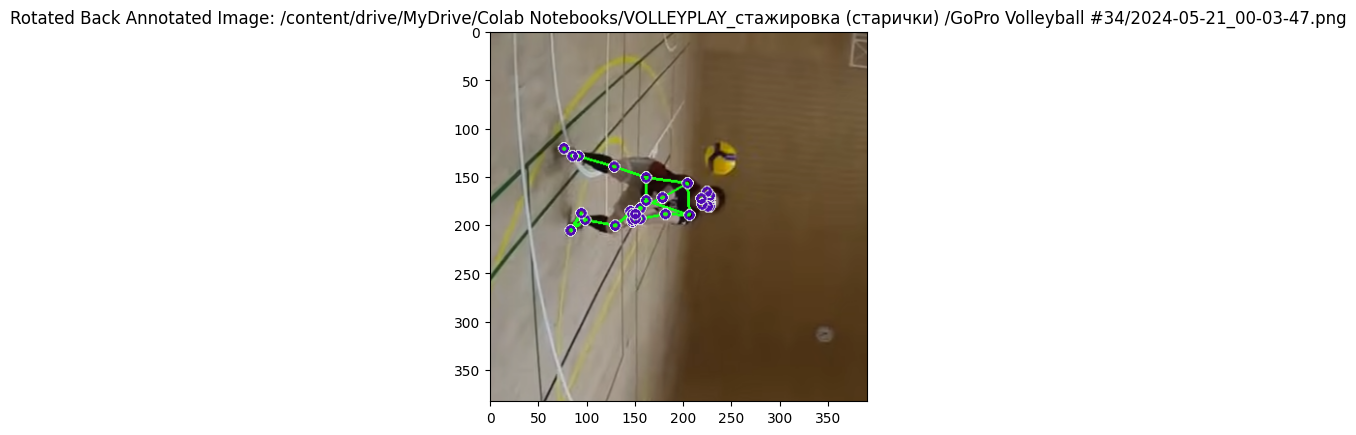

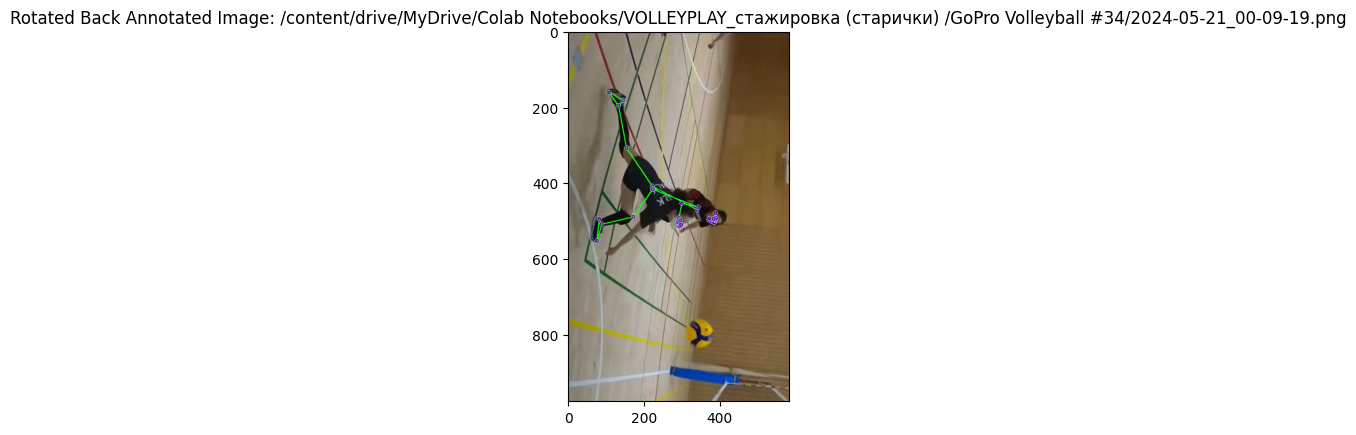

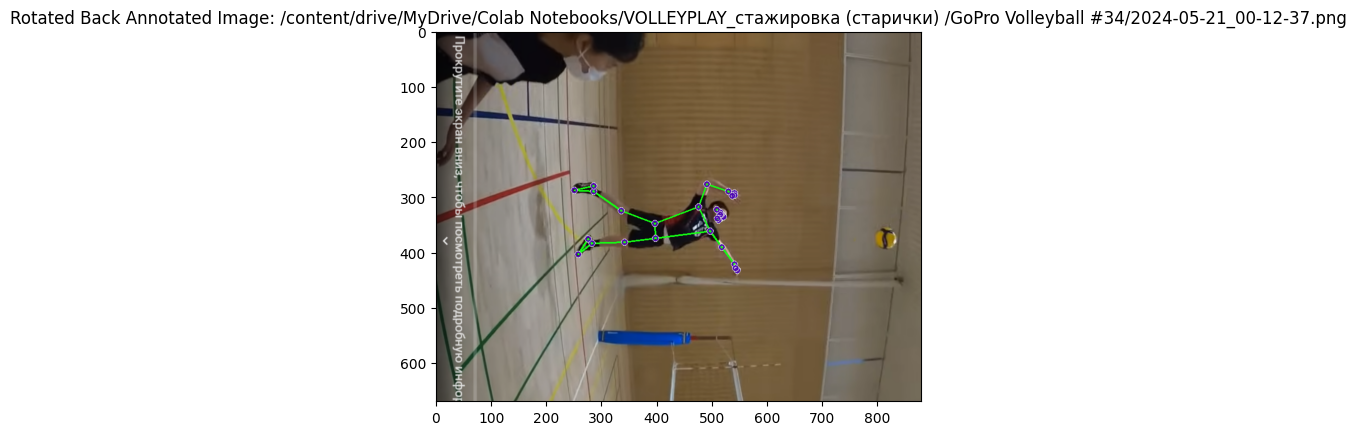

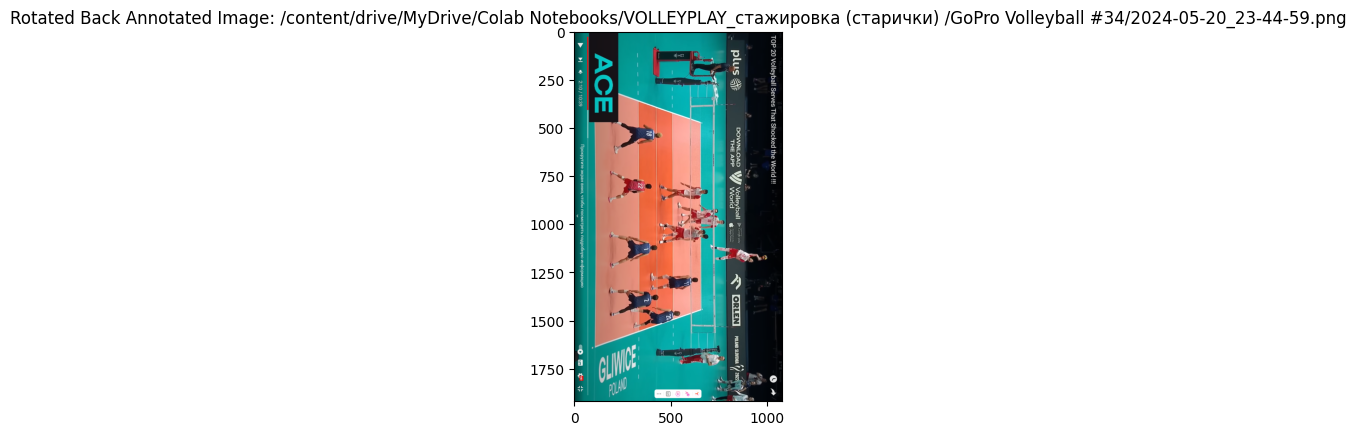

In [ ]:
# Монтирование Google Диска
drive.mount('/content/drive')

# Пути к вашим изображениям на Google Диске
image_paths = [
    '/content/drive/MyDrive/Colab Notebooks/VOLLEYPLAY_стажировка (старички) /GoPro Volleyball #34/2024-04-30_03-00-02.png',
    '/content/drive/MyDrive/Colab Notebooks/VOLLEYPLAY_стажировка (старички) /GoPro Volleyball #34/2024-05-21_00-03-47.png',
    '/content/drive/MyDrive/Colab Notebooks/VOLLEYPLAY_стажировка (старички) /GoPro Volleyball #34/2024-05-21_00-09-19.png',
    '/content/drive/MyDrive/Colab Notebooks/VOLLEYPLAY_стажировка (старички) /GoPro Volleyball #34/2024-05-21_00-12-37.png',
    '/content/drive/MyDrive/Colab Notebooks/VOLLEYPLAY_стажировка (старички) /GoPro Volleyball #34/2024-05-20_23-44-59.png'
]

# Чтение и декодирование изображений с помощью TensorFlow
images = {path: tf.image.decode_jpeg(tf.io.read_file(path)) for path in image_paths}

# Подключение к модулю MediaPipe Pose solution
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# Запуск MediaPipe Pose и отрисовка ключевых точек
with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose:
    for path, image in images.items():
        # Преобразование изображения из TensorFlow в формат, совместимый с OpenCV
        image = image.numpy()
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Обработка изображения с помощью MediaPipe Pose
        results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        # Отрисовка ключевых точек положения тела человека
        annotated_image = image.copy()
        if results.pose_landmarks:
            mp_drawing.draw_landmarks(
                annotated_image,
                results.pose_landmarks,
                mp_pose.POSE_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(180, 10, 80), thickness=2, circle_radius=4),
                mp_drawing.DrawingSpec(color=(20, 255, 20), thickness=2, circle_radius=2)
            )

        # Поворот аннотированного изображения на 90 градусов по часовой стрелке
        rotated_back_image = cv2.rotate(annotated_image, cv2.ROTATE_90_CLOCKWISE)


        # Отображение повернутого обратно изображения с ключевыми точками
        plt.imshow(cv2.cvtColor(rotated_back_image, cv2.COLOR_BGR2RGB))
        plt.title(f'Rotated Back Annotated Image: {path}')
        plt.show()

Мировые координаты носа:
x: 0.500381231
y: -0.0497358739
z: -0.444044828
visibility: 0.999922156



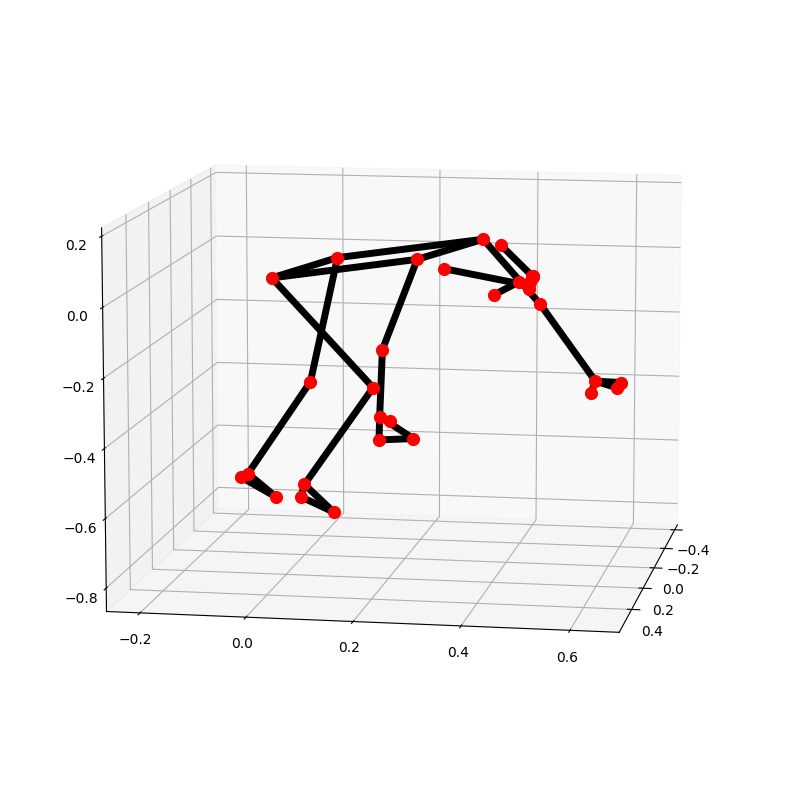

Мировые координаты носа:
x: 0.0920055807
y: -0.460258454
z: -0.565742671
visibility: 0.999991775



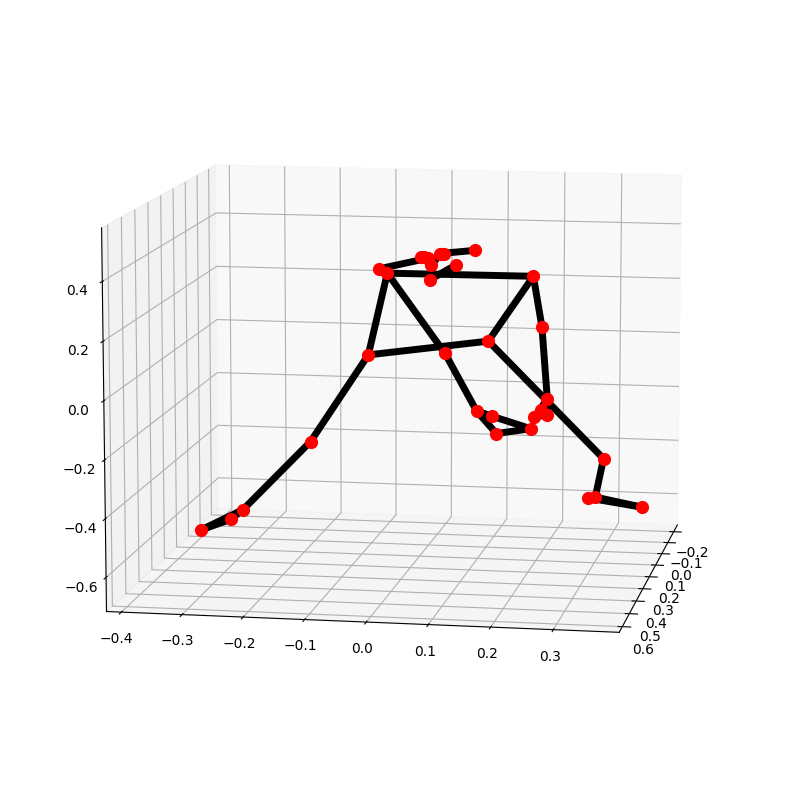

Мировые координаты носа:
x: 0.337974042
y: -0.538979113
z: -0.115346849
visibility: 0.999979734



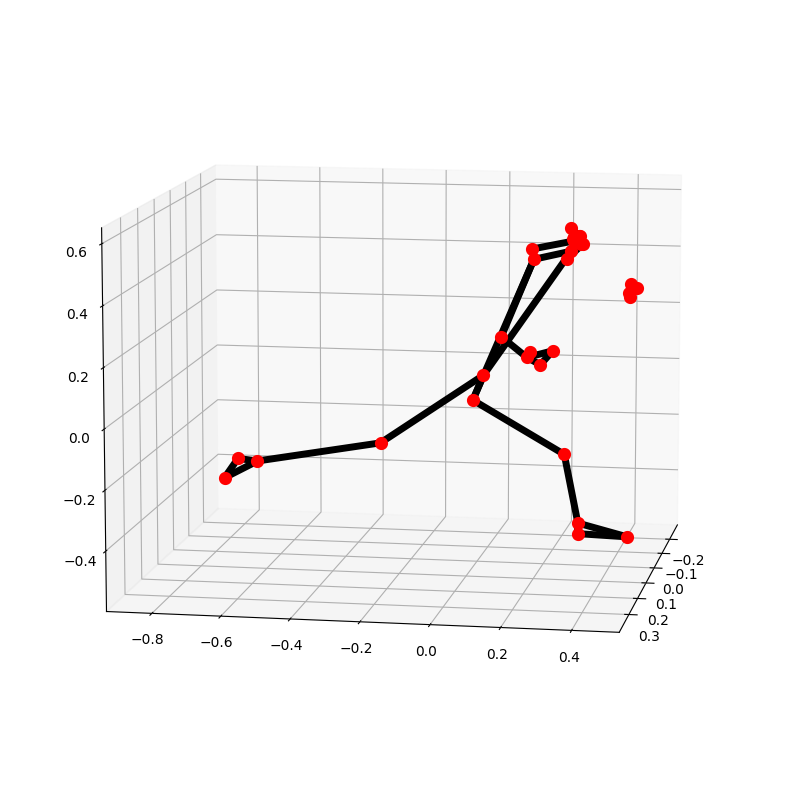

Мировые координаты носа:
x: -0.108737752
y: -0.667762756
z: -0.231144473
visibility: 0.998573303



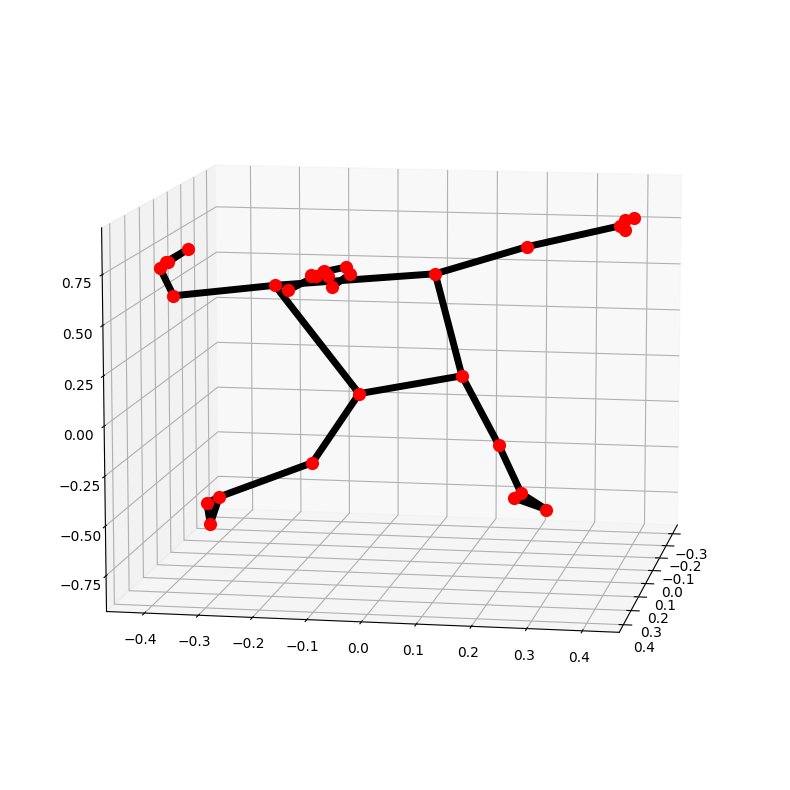

Мировые координаты носа:


AttributeError: 'NoneType' object has no attribute 'landmark'

In [ ]:
# Инициализация MediaPipe Pose
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# Запуск MediaPipe Pose и отображение 3D координат ключевых точек
with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose:
    for path in image_paths:
        # Чтение изображения
        image = cv2.imread(path)
        # Обработка изображения с помощью MediaPipe Pose
        results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        # Вывод в реальном мире 3D координат носа в метрах с началом координат в центре между бедрами
        print('Мировые координаты носа:')
        print(results.pose_world_landmarks.landmark[mp_pose.PoseLandmark.NOSE])

        # Отображение мировых координат ключевых точек
        if results.pose_world_landmarks:
            mp_drawing.plot_landmarks(
                results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

Сегментация позы для /content/drive/MyDrive/Colab Notebooks/VOLLEYPLAY_стажировка (старички) /GoPro Volleyball #34/2024-04-30_03-00-02.png:


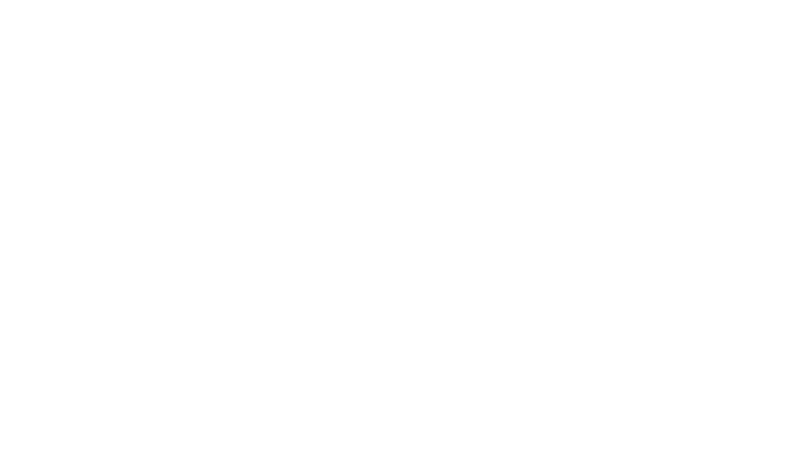

Сегментация позы для /content/drive/MyDrive/Colab Notebooks/VOLLEYPLAY_стажировка (старички) /GoPro Volleyball #34/2024-05-21_00-03-47.png:


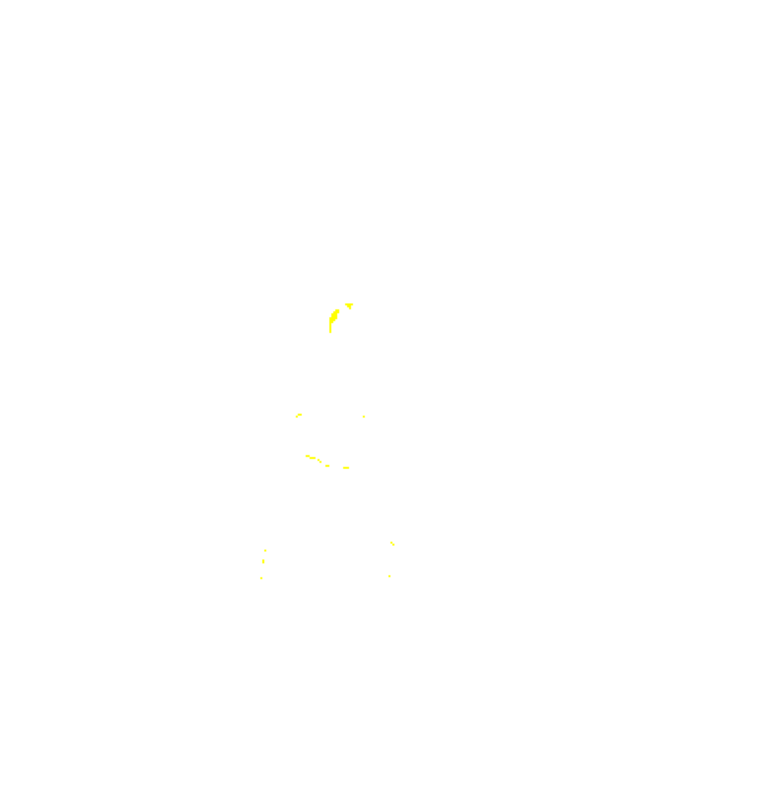

Сегментация позы для /content/drive/MyDrive/Colab Notebooks/VOLLEYPLAY_стажировка (старички) /GoPro Volleyball #34/2024-05-21_00-09-19.png:


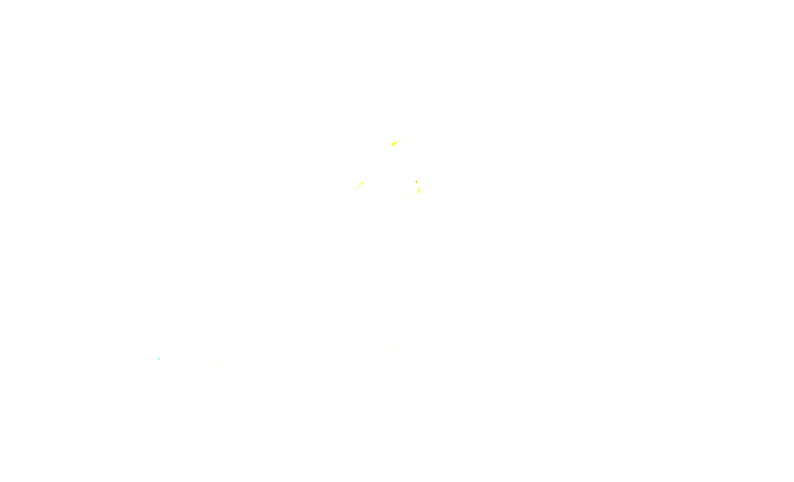

Сегментация позы для /content/drive/MyDrive/Colab Notebooks/VOLLEYPLAY_стажировка (старички) /GoPro Volleyball #34/2024-05-21_00-12-37.png:


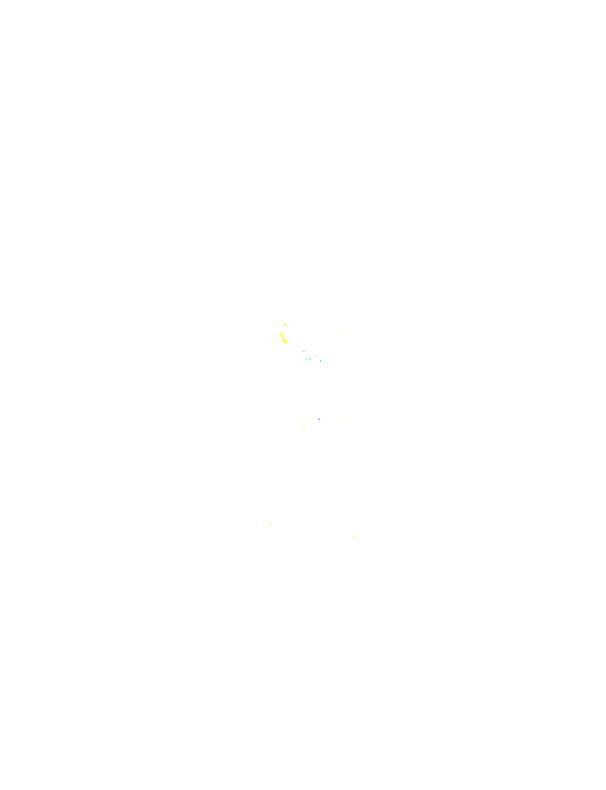

Сегментация позы для /content/drive/MyDrive/Colab Notebooks/VOLLEYPLAY_стажировка (старички) /GoPro Volleyball #34/2024-05-20_23-44-59.png:


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

In [ ]:
# Инициализация MediaPipe Pose
mp_pose = mp.solutions.pose

# Функция для изменения размера и отображения изображения
def resize_and_show(image):
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Запуск MediaPipe Pose с включенной сегментацией для получения сегментации позы
with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, model_complexity=2, enable_segmentation=True) as pose:
    for path in image_paths:
        # Чтение изображения
        image = cv2.imread(path)
        if image is None:
            print(f"Не удалось загрузить изображение: {path}")
            continue
        # Обработка изображения с помощью MediaPipe Pose
        results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        # Отрисовка сегментации позы
        print(f'Сегментация позы для {path}:')
        annotated_image = image.copy()
        red_img = np.zeros_like(annotated_image, dtype=np.uint8)
        red_img[:, :] = (255, 255, 255)
        segm_2class = 0.2 + 0.8 * results.segmentation_mask
        segm_2class = np.repeat(segm_2class[..., np.newaxis], 3, axis=2)
        annotated_image = annotated_image * segm_2class + red_img * (1 - segm_2class)
        resize_and_show(annotated_image)

# **Резюме:**
в серии представленных кодовых фрагментов были выполнены следующие действия: монтирование Google Диска для доступа к изображениям, чтение и декодирование изображений с помощью TensorFlow, анализ позы человека с использованием MediaPipe Pose, включая сегментацию позы и отображение 3D координат ключевых точек. Была реализована функция для изменения размера и отображения аннотированных изображений. В случае ошибок чтения изображений выводились предупреждения. Изображения поворачиваются на 90 градусов для корректного отображения, но попытка вернуть их в исходное положение через повторный поворот не увенчалась успехом. В последующих шагах кода, mediapipe используется для отображения 3D координат ключевых точек, что позволяет получить более глубокое понимание позы человека в пространстве.В конце, включается сегментация позы, что дает возможность выделить фигуру человека на изображении, улучшая визуализацию и анализ (тоже не увенчалось успехом). В результате были получены визуализации, позволяющие оценить и анализировать позы человека на изображениях для возможных применений в спортивных тренировках или биомеханических исследованиях. Эти операции демонстрируют применение компьютерного зрения и машинного обучения в обработке изображений.